<a href="https://colab.research.google.com/github/sp1999/SHALA2020/blob/master/Assignment_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
# data analysis 
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [323]:
# importing data
url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv"
titanic_data = pd.read_csv(url)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [324]:
# analyzing by describing data
titanic_data.shape

(891, 12)

In [325]:
# analyzing by describing data
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [326]:
# analyzing by describing data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [327]:
# analyzing by describing data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [328]:
# analyzing by pivoting Pclass feature against Survived label
titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# We observe that there is significant correlation (>0.5) among Pclass=1 and Survived

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [329]:
# analyzing by pivoting Parch feature against Survived label
titanic_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# We observe that Parch has zero correlation with survived for certain values

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [330]:
# analyzing by pivoting Sex feature against Survived label
titanic_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# We observe that female passengers have very high survival rate at 74%

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [331]:
# analyzing by pivoting SibSp feature against Survived label
titanic_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# We observe that SibSp has zero correlation with survived for certain values

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


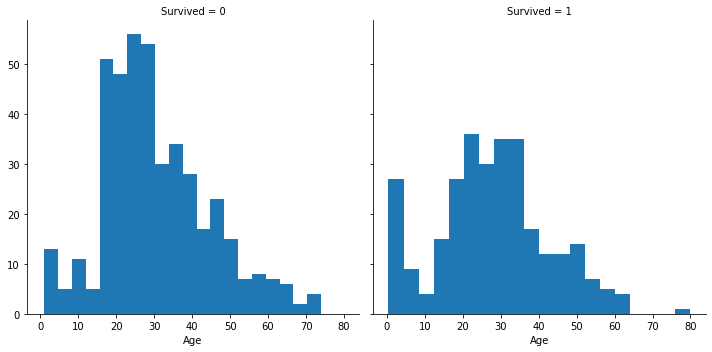

In [332]:
# analyzing by visualising Age data by plotting its histogram 
g = sns.FacetGrid(titanic_data, col='Survived', height=5)
g.map(plt.hist, 'Age', bins=20)
# We observe that infants (Age <=4) have high survival rate and oldest passengers (Age = 80) also survived.
# Also large number of 15-25 year olds did not survive.
# Most passengers are in 15-35 age range.

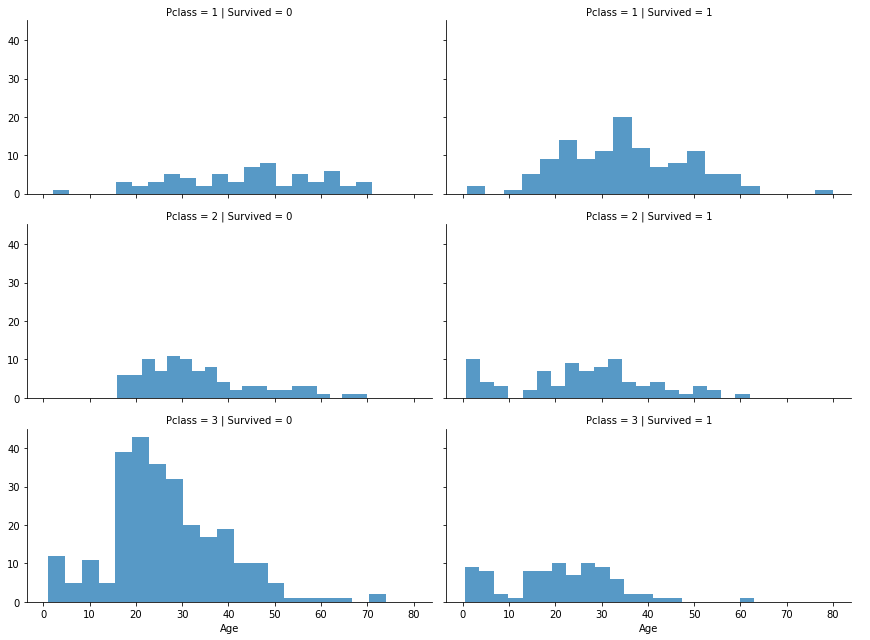

In [333]:
# analyzing by visualising Age data by plotting its histogram for each Pclass value
grid = sns.FacetGrid(titanic_data, col='Survived', row='Pclass', height=3, aspect=2)
grid.map(plt.hist, 'Age', alpha=0.75, bins=20)
grid.add_legend()
# We observe that Pclass=3 has most passengers and most of them did not survive.
# Most passengers in Pclass=1 survived.
# Infant passengers in Pclass=2 and Pclass=3 mostly survived.

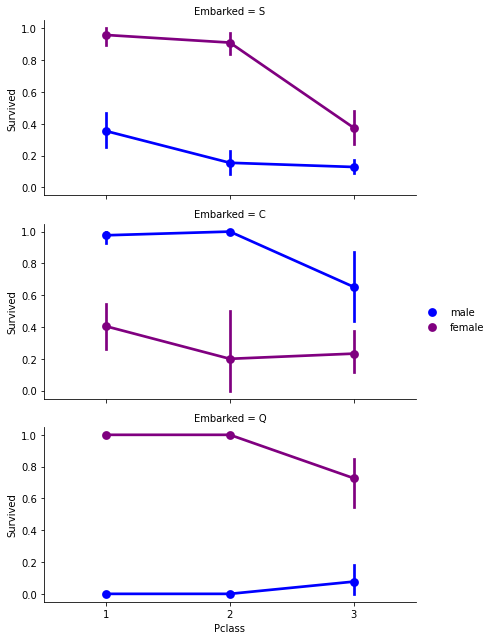

In [334]:
# analyzing by visualising Pclass, Survived and Sex data by plotting their pointplots for each Embarked value
grid = sns.FacetGrid(titanic_data, row='Embarked', height=3, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=['blue', 'purple'], order=None, hue_order=None)
grid.add_legend()
# We observe that Female passengers had much better survival rate than males for Embarked=S and Embarked=Q
# There is an exception in Embarked=C where male passengers have higher survival rate. 

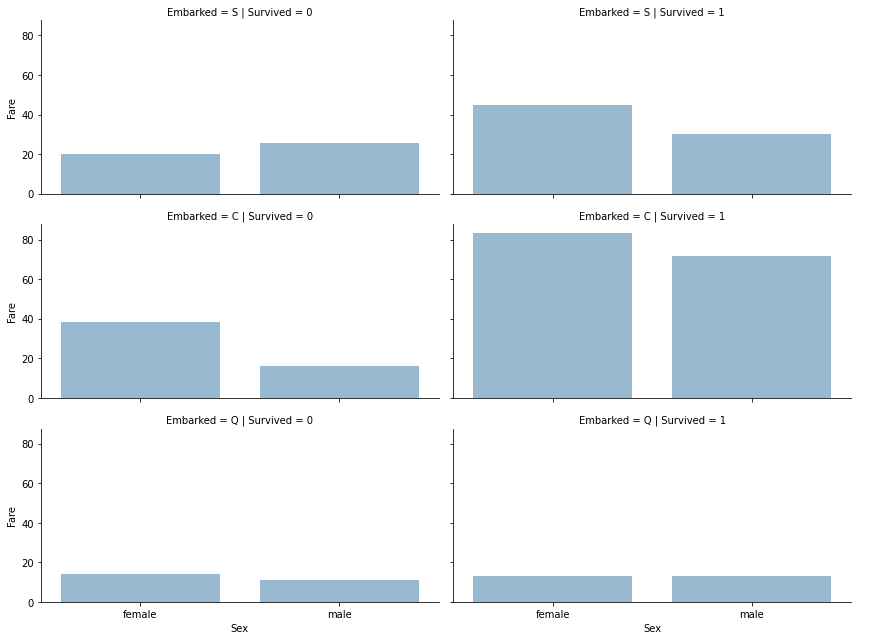

In [335]:
# analyzing by visualising Fare and Sex data by plotting their barplots for each pair of Embarked and Survived value
grid = sns.FacetGrid(titanic_data, row='Embarked', col='Survived', height=3, aspect=2)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=None)
grid.add_legend()
# We observe that higher fare paying passengers have better survival rate. 

In [336]:
# Dropping the Ticket and Cabin features as they dont have correlation with Survived
print("Before", titanic_data.shape)
titanic_data = titanic_data.drop(['Ticket', 'Cabin'], axis=1)
print("After", titanic_data.shape)

Before (891, 12)
After (891, 10)


In [337]:
# Analyzing if Name feature can be engineered to extract titles and test correlation between titles and survival, 
# before dropping Name and PassengerId features.
titanic_data['Title'] = titanic_data["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic_data['Title'], titanic_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [338]:
# Replacing many titles with a more common name or classifying them as Rare.
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data['Title'] = titanic_data['Title'].replace('Mlle', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Ms', 'Miss')
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')
titanic_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [339]:
# Converting the categorical titles to ordinal values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic_data['Title'] = titanic_data['Title'].map(title_mapping)
titanic_data['Title'] = titanic_data['Title'].fillna(0)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [340]:
# Dropping the Name and PassengerId features
titanic_data = titanic_data.drop(['Name', 'PassengerId'], axis=1)
titanic_data.shape

(891, 9)

In [341]:
 # Converting Sex feature to a new feature called Gender where female=1 and male=0.
 titanic_data['Sex'] = titanic_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
 titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [342]:
# Completing Age feature by guessing missing or null values by using other correlated features
# Preparing an empty array to contain guessed Age values based on Pclass and Gender combinations
guess_ages = np.zeros((2,3))

# Iterating over Sex (0 or 1) and Pclass (1, 2, 3) features to calculate guessed values of Age for the six combinations.
for i in range(0, 2):
  for j in range(0, 3):
    guess_df = titanic_data[(titanic_data['Sex'] == i) & (titanic_data['Pclass'] == j+1)]['Age'].dropna()
    age_guess = guess_df.median()
    # Converting random age float to nearest .5 age
    guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
for i in range(0, 2):
  for j in range(0, 3):
    titanic_data.loc[(titanic_data["Age"].isnull()) & (titanic_data["Sex"] == i) & (titanic_data["Pclass"] == j+1),"Age"] = guess_ages[i,j]
titanic_data['Age'] = titanic_data['Age'].astype(int)
print(titanic_data.isna().sum())
titanic_data.head()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [343]:
# Creating Age bands and determining correlations with Survived
titanic_data['AgeBand'] = pd.cut(titanic_data['Age'], 5)
titanic_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [344]:
# Replacing Age with ordinal values based on these bands
titanic_data.loc[titanic_data['Age'] <= 16, 'Age'] = 0
titanic_data.loc[(titanic_data['Age'] > 16) & (titanic_data['Age'] <= 32), 'Age'] = 1
titanic_data.loc[(titanic_data['Age'] > 32) & (titanic_data['Age'] <= 48), 'Age'] = 2
titanic_data.loc[(titanic_data['Age'] > 48) & (titanic_data['Age'] <= 64), 'Age'] = 3
titanic_data.loc[titanic_data['Age'] > 64, 'Age']
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [345]:
# Removing the AgeBand feature
titanic_data = titanic_data.drop(['AgeBand'], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [346]:
# Completing the Embarked feature by filling the missing values with the most common occurrence
freq_port = titanic_data["Embarked"].dropna().mode()[0]
print(freq_port)
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(freq_port)
titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

S


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [347]:
# Converting the Embarked feature by creating a new numeric Port feature
titanic_data['Embarked'] = titanic_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


In [0]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

In [349]:
SEED=1
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((712, 8), (712,), (179, 8), (179,))

In [350]:
# Logistic Regression

logreg = LogisticRegression(random_state=SEED)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
accuracy_score_log = accuracy_score(Y_test,Y_pred)
acc_log

80.06

In [351]:
# Support Vector Machines

svc = SVC(random_state=SEED)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
accuracy_score_svc = accuracy_score(Y_test,Y_pred)
acc_svc

69.38

In [352]:
# k-Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
accuracy_score_knn = accuracy_score(Y_test,Y_pred)
acc_knn

87.22

In [353]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
accuracy_score_gaussian = accuracy_score(Y_test,Y_pred)
acc_gaussian

81.32

In [354]:
# Perceptron

perceptron = Perceptron(random_state=SEED)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
accuracy_score_perceptron = accuracy_score(Y_test,Y_pred)
acc_perceptron

72.47

In [355]:
# Linear SVC

import warnings
warnings.filterwarnings("ignore")
linear_svc = LinearSVC(max_iter=100000, random_state=SEED)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
accuracy_score_linear_svc = accuracy_score(Y_test,Y_pred)
acc_linear_svc

79.78

In [356]:
# Stochastic Gradient Descent

sgd = SGDClassifier(random_state=SEED)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
accuracy_score_sgd = accuracy_score(Y_test,Y_pred)
acc_sgd

78.79

In [357]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=SEED)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
accuracy_score_decision_tree = accuracy_score(Y_test,Y_pred)
acc_decision_tree

94.8

In [358]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, random_state=SEED)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
accuracy_score_random_forest = accuracy_score(Y_test,Y_pred)
acc_random_forest


94.8

In [359]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,94.80
8,Decision Tree,94.80
1,KNN,87.22
4,Naive Bayes,81.32
2,Logistic Regression,80.06
7,Linear SVC,79.78
6,Stochastic Gradient Decent,78.79
5,Perceptron,72.47
0,Support Vector Machines,69.38


In [388]:
classifiers = ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree']
scores = [accuracy_score_svc, accuracy_score_knn, accuracy_score_log, accuracy_score_random_forest,
          accuracy_score_gaussian, accuracy_score_perceptron, accuracy_score_sgd,
          accuracy_score_linear_svc, accuracy_score_decision_tree]
for i in range(9):
  print('{:s}: {:f}'.format(classifiers[i],scores[i]))

Support Vector Machines: 0.653631
KNN: 0.782123
Logistic Regression: 0.776536
Random Forest: 0.787709
Naive Bayes: 0.765363
Perceptron: 0.703911
Stochastic Gradient Decent: 0.776536
Linear SVC: 0.765363
Decision Tree: 0.759777


In [392]:
# Using Boosting Techniques to improve accuracy
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
ad=AdaBoostClassifier(base_estimator=decision_tree,n_estimators=100)
gd=GradientBoostingClassifier(n_estimators=100)
xgb=XGBClassifier(base_estimator=decision_tree,n_estimators=100)
boosters=[('Adaboost',ad),('GradientBoost',gd),('XGBoost',xgb)]
for booster_name,booster in boosters:
   booster.fit(X_train,Y_train)
   Y_pred=booster.predict(X_test)
   print('{:s}:{:.3f}'.format(booster_name,accuracy_score(Y_test,Y_pred)))

Adaboost:0.760
GradientBoost:0.788
XGBoost:0.788


In [394]:
# Metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report
# Calculating the metrics for all the models
models=[('Support Vector Machines',svc), ('KNN',knn), ('Logistic Regression',logreg), 
        ('Random Forest',random_forest), ('Naive Bayes', gaussian), ('Perceptron', perceptron), 
        ('Stochastic Gradient Decent', sgd), ('Linear SVC', linear_svc), 
        ('Decision Tree', decision_tree)]
for model_name,model in models:
  print(model_name)
  Y_pred=model.predict(X_test)
  print(confusion_matrix(Y_test,Y_pred))
  print('*'*30)
  print(classification_report(Y_test,Y_pred))
  print('ROC_AUC: {:.2f}'.format(roc_auc_score(Y_test,Y_pred)))
  print('\n')

Support Vector Machines
[[97  9]
 [53 20]]
******************************
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       106
           1       0.69      0.27      0.39        73

    accuracy                           0.65       179
   macro avg       0.67      0.59      0.57       179
weighted avg       0.66      0.65      0.61       179

ROC_AUC: 0.59


KNN
[[96 10]
 [29 44]]
******************************
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       106
           1       0.81      0.60      0.69        73

    accuracy                           0.78       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.79      0.78      0.77       179

ROC_AUC: 0.75


Logistic Regression
[[91 15]
 [25 48]]
******************************
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       106
       

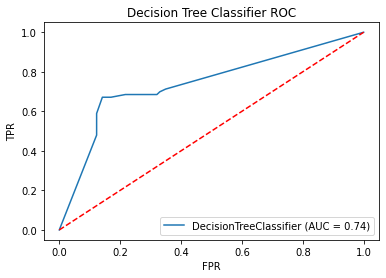

In [396]:
# Plotting ROC curve for Decision Tree
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
decision_tree_disp = plot_roc_curve(decision_tree,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Decision Tree Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

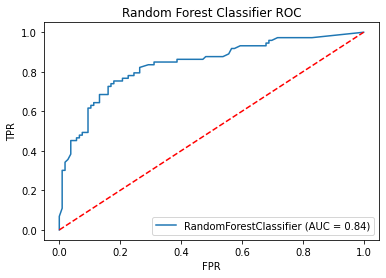

In [398]:
# Plotting ROC curve for Random Forest
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
random_forest_disp = plot_roc_curve(random_forest,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Random Forest Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

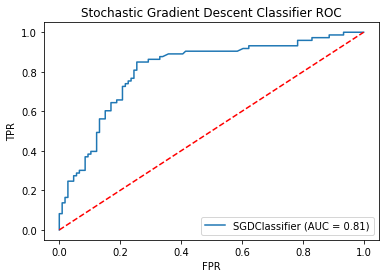

In [400]:
# Plotting ROC curve for Stochastic Gradient Descent
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
sgd_disp = plot_roc_curve(sgd,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Stochastic Gradient Descent Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

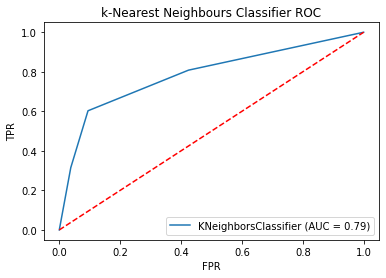

In [402]:
# Plotting ROC curve for k-Nearest Neighbours
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
knn_disp = plot_roc_curve(knn,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('k-Nearest Neighbours Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

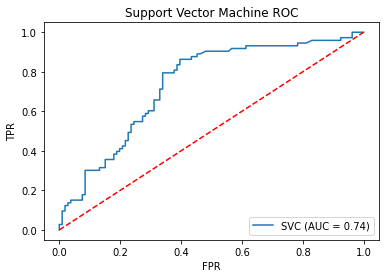

In [404]:
# Plotting ROC curve for Support Vector Machines
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
svc_disp = plot_roc_curve(svc,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Support Vector Machine ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

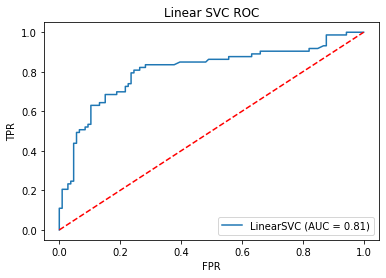

In [406]:
# Plotting ROC curve for Linear SVC
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
linear_svc_disp = plot_roc_curve(linear_svc,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Linear SVC ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

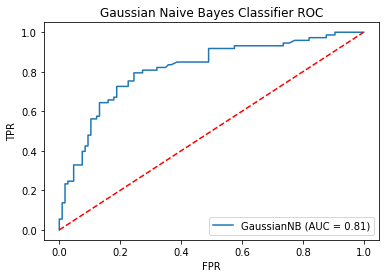

In [408]:
# Plotting ROC curve for Gaussian Naive Bayes
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
gaussian_disp = plot_roc_curve(gaussian,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Gaussian Naive Bayes Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

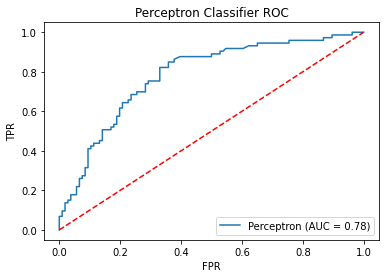

In [409]:
# Plotting ROC curve for Perceptron
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
perceptron_disp = plot_roc_curve(perceptron,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Perceptron Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()

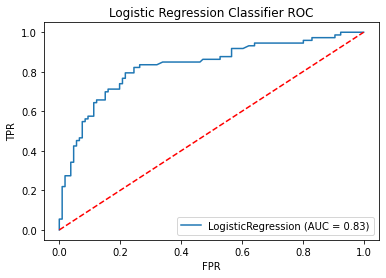

In [410]:
# Plotting ROC curve for Logistic Regression
from sklearn.metrics import plot_roc_curve
ax=plt.gca()
logreg_disp = plot_roc_curve(logreg,X_test,Y_test,ax=ax)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression Classifier ROC')
plt.plot([0,1],[0,1],'r--')
plt.show()